In [1]:
yaml_dir = "/home/jb2483/nfs_folder/git/public/distgen/examples/data/"
from distgen import Generator
from distgen.plot import plot_dist2d, plot_current_profile
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(
    {"font.size": 20, "lines.linewidth": 2.5, "figure.figsize": (10, 6)}
)

# Generating initial beam distribution
In this notebook, desired uniform and truncated gaussian distributions are generated.
The results were copy pasted into the yaml files in beamline folder using gedit.

# Uniform Distribution

In [8]:
input_file = yaml_dir + "rad.uniform.in.yaml"
gen = Generator(input_file, verbose=1)
print(gen)
gen.input

<disgten.Generator with input: 
n_particle: 100000
output:
  file: rad.uniform.out.txt
  type: gpt
r_dist:
  max_r:
    units: mm
    value: 2
  min_r:
    units: mm
    value: 1
  type: radial_uniform
random_type: hammersley
start:
  MTE:
    units: meV
    value: 150
  type: cathode
t_dist:
  avg_t:
    units: ns
    value: 0.5
  sigma_t:
    units: ns
    value: 2
  type: gaussian
total_charge:
  units: pC
  value: 10

>


{'n_particle': 100000,
 'output': {'file': 'rad.uniform.out.txt', 'type': 'gpt'},
 'r_dist': {'max_r': {'units': 'mm', 'value': 2},
  'min_r': {'units': 'mm', 'value': 1},
  'type': 'radial_uniform'},
 'random_type': 'hammersley',
 'start': {'MTE': {'units': 'meV', 'value': 150}, 'type': 'cathode'},
 't_dist': {'avg_t': {'units': 'ns', 'value': 0.5},
  'sigma_t': {'units': 'ns', 'value': 2},
  'type': 'gaussian'},
 'total_charge': {'units': 'pC', 'value': 10}}

Distribution format: gpt
Output file: rad.uniform.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 15 pC.
   Number of macroparticles: 10000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 0.25 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -150 ps, max_t = 150 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 1062.208 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 1062.208 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 1062.208 eV/c
   Shifting avg_x = -3.73586E-05 mm -> 0 mm
   Scaling sigma_x = 0.124965 mm -> 0.125 mm
   Shifting avg_y = -6.93281E-06 mm -> 0 mm
   Scaling sigma_y = 0.125003 mm -> 0.125 mm
   Shifting avg_px = -0.982323 eV/c -> 0 eV/c
   Scaling sigma_px = 1061.93 eV/c -> 1062.21 eV/c
   Shifting avg_py = -1.53285 eV/c -> 0 eV/c
   Scaling 

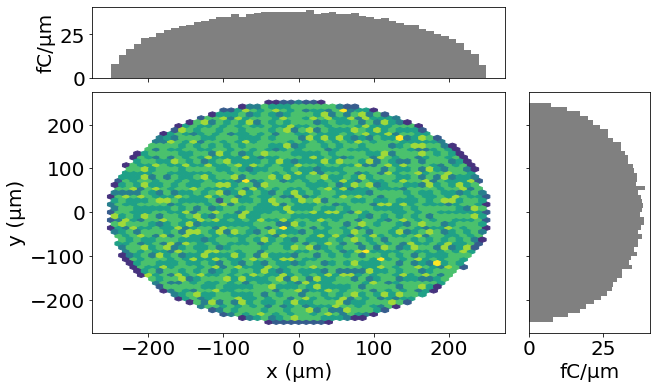

In [9]:
gen["n_particle"] = 10000
gen["total_charge:value"] = 15
gen["t_dist"] = {
    "type": "uniform",
    "max_t": {"units": "ps", "value": 150},
    "min_t": {"units": "ps", "value": -150},
}
gen.input["r_dist"]["min_r"]["value"] = 0
gen.input["r_dist"]["max_r"]["value"] = 250e-3  # / np.sqrt(3)
# gen.input['start']['MTE']['value'] = 100
gen["start:MTE:value"] = 2208
gen.run()
gen.particles.plot("x", "y")

Distribution format: gpt
Output file: rad.uniform.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 15 pC.
   Number of macroparticles: 10000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 0.25 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -150 ps, max_t = 150 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 1062.208 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 1062.208 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 1062.208 eV/c
   Shifting avg_x = -3.73586E-05 mm -> 0 mm
   Scaling sigma_x = 0.124965 mm -> 0.125 mm
   Shifting avg_y = -6.93281E-06 mm -> 0 mm
   Scaling sigma_y = 0.125003 mm -> 0.125 mm
   Shifting avg_px = -0.982323 eV/c -> 0 eV/c
   Scaling sigma_px = 1061.93 eV/c -> 1062.21 eV/c
   Shifting avg_py = -1.53285 eV/c -> 0 eV/c
   Scaling 

<AxesSubplot:title={'center':'$<x>$ = -1.73472E-14 µm, $\\sigma_{x}$ = 125 µm\n$<y>$ = -3.46945E-15 µm, $\\sigma_{y}$ = 125 µm'}, xlabel='$x$ (µm)', ylabel='$y$ (µm)'>

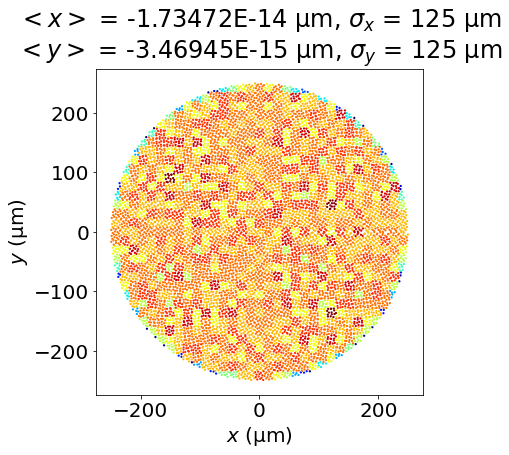

In [10]:
beam = gen.beam()
plot_dist2d(beam, "x", "um", "y", "um", axis="equal", title_on=True)

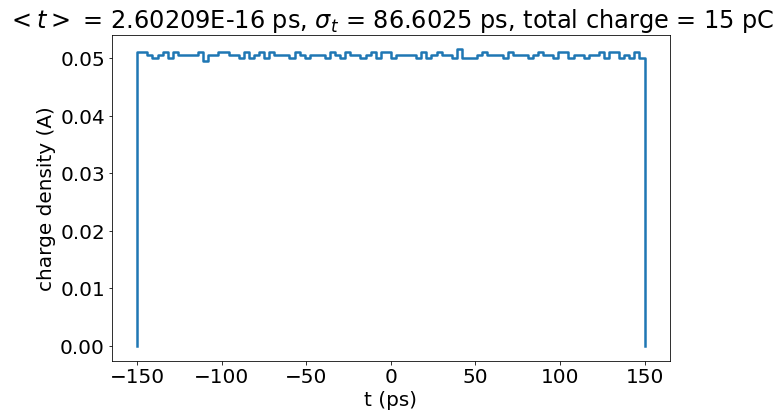

In [11]:
plot_current_profile(beam, "ps", "A", title_on=True)

In [12]:
print(gen)

<disgten.Generator with input: 
n_particle: 10000
output:
  file: rad.uniform.out.txt
  type: gpt
r_dist:
  max_r:
    units: mm
    value: 0.25
  min_r:
    units: mm
    value: 0
  type: radial_uniform
random_type: hammersley
start:
  MTE:
    units: meV
    value: 2208
  type: cathode
t_dist:
  max_t:
    units: ps
    value: 150
  min_t:
    units: ps
    value: -150
  type: uniform
total_charge:
  units: pC
  value: 15

>


# Truncated Gaussian

In [13]:
input_file = yaml_dir + "rad.trunc.gaussian.in.yaml"
gen = Generator(input_file, verbose=1)
print(gen)
gen.input

<disgten.Generator with input: 
n_particle: 200000
output:
  file: rad.trunc.gaussian.out.txt
  type: gpt
r_dist:
  truncation_fraction:
    units: dimensionless
    value: 0.5
  truncation_radius:
    units: mm
    value: 1
  type: rg
random_type: hammersley
start:
  MTE:
    units: meV
    value: 150
  type: cathode
total_charge:
  units: pC
  value: 10

>


{'n_particle': 200000,
 'output': {'file': 'rad.trunc.gaussian.out.txt', 'type': 'gpt'},
 'r_dist': {'truncation_fraction': {'units': 'dimensionless', 'value': 0.5},
  'truncation_radius': {'units': 'mm', 'value': 1},
  'type': 'rg'},
 'random_type': 'hammersley',
 'start': {'MTE': {'units': 'meV', 'value': 150}, 'type': 'cathode'},
 'total_charge': {'units': 'pC', 'value': 10}}

Distribution format: gpt
Output file: rad.trunc.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 15 pC.
   Number of macroparticles: 10000.
   Assuming cylindrical symmetry...
   r distribution: radial Gaussian
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -150 ps, max_t = 150 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 319.687 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 319.687 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 319.687 eV/c
   Shifting avg_x = -3.66476E-05 mm -> 0 mm
   Scaling sigma_x = 0.117582 mm -> 0.117619 mm
   Shifting avg_y = -6.9842E-06 mm -> 0 mm
   Scaling sigma_y = 0.117622 mm -> 0.117619 mm
   Shifting avg_px = -0.295644 eV/c -> 0 eV/c
   Scaling sigma_px = 319.602 eV/c -> 319.687 eV/c
   Shifting avg_py = -0.461332 eV/c -> 0 eV/c
   Scaling sigma_py = 319.625 eV/c -

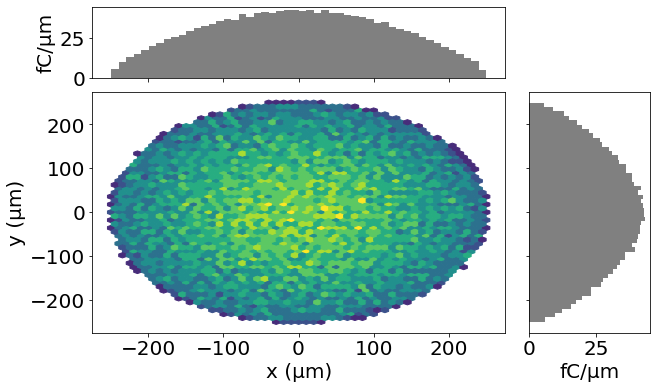

In [14]:
gen["n_particle"] = 10000
gen["total_charge:value"] = 15
gen.input["t_dist"] = {
    "type": "uniform",
    "max_t": {"units": "ps", "value": 150},
    "min_t": {"units": "ps", "value": -150},
}
gen["r_dist:truncation_radius:value"] = 0.25
gen["start:MTE:value"] = 200
gen['r_dist:truncation_fraction:value'] = 0.5
gen.run()
gen.particles.plot("x", "y")

Distribution format: gpt
Output file: rad.trunc.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 15 pC.
   Number of macroparticles: 10000.
   Assuming cylindrical symmetry...
   r distribution: radial Gaussian
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -150 ps, max_t = 150 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 319.687 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 319.687 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 319.687 eV/c
   Shifting avg_x = -3.66476E-05 mm -> 0 mm
   Scaling sigma_x = 0.117582 mm -> 0.117619 mm
   Shifting avg_y = -6.9842E-06 mm -> 0 mm
   Scaling sigma_y = 0.117622 mm -> 0.117619 mm
   Shifting avg_px = -0.295644 eV/c -> 0 eV/c
   Scaling sigma_px = 319.602 eV/c -> 319.687 eV/c
   Shifting avg_py = -0.461332 eV/c -> 0 eV/c
   Scaling sigma_py = 319.625 eV/c -

<AxesSubplot:title={'center':'$<x>$ = 1.38778E-14 µm, $\\sigma_{x}$ = 117.619 µm\n$<y>$ = -5.20417E-15 µm, $\\sigma_{y}$ = 117.619 µm'}, xlabel='$x$ (µm)', ylabel='$y$ (µm)'>

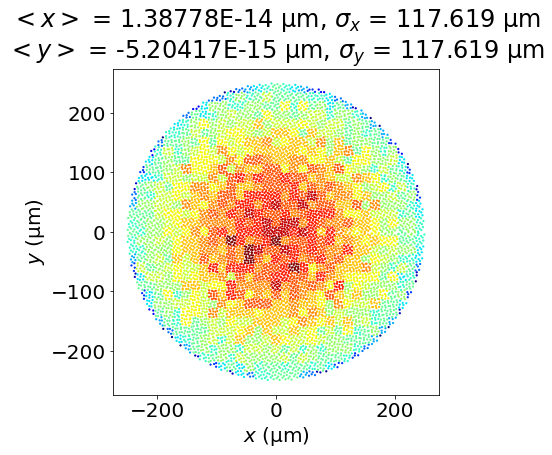

In [15]:
beam = gen.beam()
plot_dist2d(beam, "x", "um", "y", "um", axis="equal", title_on=True)

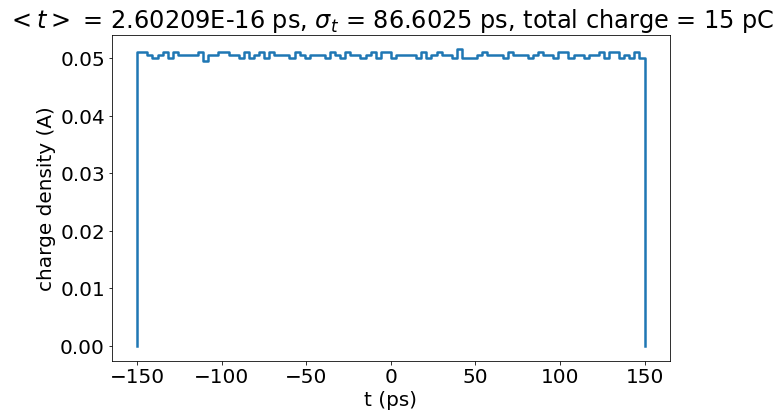

In [16]:
plot_current_profile(beam, "ps", "A", title_on=True)

In [17]:
print(gen)

<disgten.Generator with input: 
n_particle: 10000
output:
  file: rad.trunc.gaussian.out.txt
  type: gpt
r_dist:
  truncation_fraction:
    units: dimensionless
    value: 0.5
  truncation_radius:
    units: mm
    value: 0.25
  type: rg
random_type: hammersley
start:
  MTE:
    units: meV
    value: 200
  type: cathode
t_dist:
  max_t:
    units: ps
    value: 150
  min_t:
    units: ps
    value: -150
  type: uniform
total_charge:
  units: pC
  value: 15

>
